In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver
from IPython.display import Image

In [2]:
load_dotenv()
model=ChatOpenAI()

In [3]:
class StateSchema(TypedDict):
    topic:str
    joke:str
    explanation:str

In [4]:
def generate_joke(state:StateSchema)->StateSchema:
    prompt=f"""
    Given the following topic. You have to generate the hilarious joke.
    Topic: {state['topic']}
"""
    response=model.invoke(prompt)
    return {
        'joke':response.content
    }

In [5]:
def generate_explanation(state:StateSchema)->StateSchema:
    prompt=f"""
    Given the following Topic and the Joke. You have to generate the explannation of that joke.
    Topic: {state['topic']}
    Joke: {state['joke']}
"""
    response=model.invoke(prompt)
    return {
        'explanation':response.content
    }

In [6]:
graph=StateGraph(StateSchema)
graph.add_node("generate_joke",generate_joke)
graph.add_node("generate_explanation",generate_explanation)

graph.add_edge(START,"generate_joke")
graph.add_edge("generate_joke","generate_explanation")
graph.add_edge("generate_explanation",END)
checkpointer=InMemorySaver()
workflow=graph.compile(checkpointer=checkpointer)

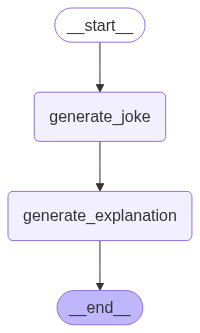

In [7]:
Image(workflow.get_graph().draw_mermaid_png())

In [8]:
config1={
    "configurable":{
        "thread_id":1
    }
}

In [17]:

res=workflow.invoke({
    "topic":"Pizza"
}, config=config1)

In [18]:
res

{'topic': 'Pizza',
 'joke': 'Why did the pizza apply for a job at the tutoring center?\nBecause it wanted to become a little more cheesy!',
 'explanation': 'Explanation: The joke plays on the idea of "cheesy" being a term used to describe something overly sentimental or corny. In this case, the pizza wanting to become "a little more cheesy" is a playful way of saying that it wanted to improve its skills or knowledge by working at a tutoring center. The humor comes from the pun on the word "cheesy" and the unexpected twist of a pizza applying for a job at a tutoring center.'}

In [19]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Pizza', 'joke': 'Why did the pizza apply for a job at the tutoring center?\nBecause it wanted to become a little more cheesy!', 'explanation': 'Explanation: The joke plays on the idea of "cheesy" being a term used to describe something overly sentimental or corny. In this case, the pizza wanting to become "a little more cheesy" is a playful way of saying that it wanted to improve its skills or knowledge by working at a tutoring center. The humor comes from the pun on the word "cheesy" and the unexpected twist of a pizza applying for a job at a tutoring center.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07a3c3-845b-67b2-800a-95b22ed6e2b5'}}, metadata={'source': 'loop', 'step': 10, 'parents': {}}, created_at='2025-08-16T00:59:10.920477+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07a3c3-7364-645a-8009-ca739555f4d8'}}, tasks=(), interrupts=())

In [20]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Pizza', 'joke': 'Why did the pizza apply for a job at the tutoring center?\nBecause it wanted to become a little more cheesy!', 'explanation': 'Explanation: The joke plays on the idea of "cheesy" being a term used to describe something overly sentimental or corny. In this case, the pizza wanting to become "a little more cheesy" is a playful way of saying that it wanted to improve its skills or knowledge by working at a tutoring center. The humor comes from the pun on the word "cheesy" and the unexpected twist of a pizza applying for a job at a tutoring center.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07a3c3-845b-67b2-800a-95b22ed6e2b5'}}, metadata={'source': 'loop', 'step': 10, 'parents': {}}, created_at='2025-08-16T00:59:10.920477+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07a3c3-7364-645a-8009-ca739555f4d8'}}, tasks=(), interrupts=()),
 State